In [1]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [2]:
codes=['ABT','AMZN','BCS','BP','C','F','GM','HMC','HSBC','JNJ','JPM','MRK','MSFT','PFE','SLB','TCEHY','TM','TSLA','UNH','XOM']

In [3]:
file=pd.read_excel(r'data\trainingFolder\master_data.xlsx')

In [4]:
article=[]
for i in range(len(file)):
    a=str(file.article[i])
    y=""
    for x in a.split("***"):
        y=y+" "+x
    article.append(str(y))
file['article']=article
File=pd.DataFrame()
File['sentence']=article
File['upintraday']=file['upintraday']
train_df=File[:800]

test_df=File[801:]
test_df.head()

,sentence,upintraday
801,UnitedHealth Group Commits Initial 50 Mill...,1
802,UnitedHealth Stock Trades Above 'Reversion...,1
803,UnitedHealth Group Leads Meal-Prep Effort ...,0
804,UnitedHealth Group UNH Gains But Lags Mark...,1
805,"The Dow Jones industrials were down 2.2%, w...",0


In [5]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    train_df, train_df["upintraday"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    train_df, train_df["upintraday"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    test_df, test_df["upintraday"], shuffle=False)

In [6]:
embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

In [7]:
'''embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/1")
embeddings = embed(test_df['sentence'])
embeddings'''

RuntimeError: Exporting/importing meta graphs is not supported when eager execution is enabled. No graph exists when eager execution is enabled.

In [93]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.keras.optimizers.Adagrad(lr=0.003))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KUMARG~1\\AppData\\Local\\Temp\\tmpig3luvw_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KUMARG~1\\AppData\\Local\\Temp\\tmpig3luvw_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [94]:
# Training for 5,000 steps means 640,000 training examples with the default
# batch size. This is roughly equivalent to 25 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=4400);

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt.


INFO:tensorflow:loss = 0.68451095, step = 0


INFO:tensorflow:loss = 0.68451095, step = 0


INFO:tensorflow:global_step/sec: 24.9834


INFO:tensorflow:global_step/sec: 24.9834


INFO:tensorflow:loss = 0.69035697, step = 100 (4.007 sec)


INFO:tensorflow:loss = 0.69035697, step = 100 (4.007 sec)


INFO:tensorflow:global_step/sec: 26.0222


INFO:tensorflow:global_step/sec: 26.0222


INFO:tensorflow:loss = 0.6766081, step = 200 (3.843 sec)


INFO:tensorflow:loss = 0.6766081, step = 200 (3.843 sec)


INFO:tensorflow:global_step/sec: 21.3595


INFO:tensorflow:global_step/sec: 21.3595


INFO:tensorflow:loss = 0.6713011, step = 300 (4.686 sec)


INFO:tensorflow:loss = 0.6713011, step = 300 (4.686 sec)


INFO:tensorflow:global_step/sec: 21.2009


INFO:tensorflow:global_step/sec: 21.2009


INFO:tensorflow:loss = 0.6782545, step = 400 (4.733 sec)


INFO:tensorflow:loss = 0.6782545, step = 400 (4.733 sec)


INFO:tensorflow:global_step/sec: 24.842


INFO:tensorflow:global_step/sec: 24.842


INFO:tensorflow:loss = 0.67750245, step = 500 (4.009 sec)


INFO:tensorflow:loss = 0.67750245, step = 500 (4.009 sec)


INFO:tensorflow:global_step/sec: 26.4623


INFO:tensorflow:global_step/sec: 26.4623


INFO:tensorflow:loss = 0.6652914, step = 600 (3.775 sec)


INFO:tensorflow:loss = 0.6652914, step = 600 (3.775 sec)


INFO:tensorflow:global_step/sec: 20.7146


INFO:tensorflow:global_step/sec: 20.7146


INFO:tensorflow:loss = 0.6561743, step = 700 (4.832 sec)


INFO:tensorflow:loss = 0.6561743, step = 700 (4.832 sec)


INFO:tensorflow:global_step/sec: 20.3657


INFO:tensorflow:global_step/sec: 20.3657


INFO:tensorflow:loss = 0.67545366, step = 800 (4.906 sec)


INFO:tensorflow:loss = 0.67545366, step = 800 (4.906 sec)


INFO:tensorflow:global_step/sec: 26.9176


INFO:tensorflow:global_step/sec: 26.9176


INFO:tensorflow:loss = 0.6464847, step = 900 (3.715 sec)


INFO:tensorflow:loss = 0.6464847, step = 900 (3.715 sec)


INFO:tensorflow:global_step/sec: 23.6952


INFO:tensorflow:global_step/sec: 23.6952


INFO:tensorflow:loss = 0.6382681, step = 1000 (4.232 sec)


INFO:tensorflow:loss = 0.6382681, step = 1000 (4.232 sec)


INFO:tensorflow:global_step/sec: 22.2717


INFO:tensorflow:global_step/sec: 22.2717


INFO:tensorflow:loss = 0.6358855, step = 1100 (4.486 sec)


INFO:tensorflow:loss = 0.6358855, step = 1100 (4.486 sec)


INFO:tensorflow:global_step/sec: 19.3802


INFO:tensorflow:global_step/sec: 19.3802


INFO:tensorflow:loss = 0.62919915, step = 1200 (5.156 sec)


INFO:tensorflow:loss = 0.62919915, step = 1200 (5.156 sec)


INFO:tensorflow:global_step/sec: 21.4878


INFO:tensorflow:global_step/sec: 21.4878


INFO:tensorflow:loss = 0.6302629, step = 1300 (4.658 sec)


INFO:tensorflow:loss = 0.6302629, step = 1300 (4.658 sec)


INFO:tensorflow:global_step/sec: 18.9792


INFO:tensorflow:global_step/sec: 18.9792


INFO:tensorflow:loss = 0.6715185, step = 1400 (5.265 sec)


INFO:tensorflow:loss = 0.6715185, step = 1400 (5.265 sec)


INFO:tensorflow:global_step/sec: 21.3752


INFO:tensorflow:global_step/sec: 21.3752


INFO:tensorflow:loss = 0.62494576, step = 1500 (4.678 sec)


INFO:tensorflow:loss = 0.62494576, step = 1500 (4.678 sec)


INFO:tensorflow:global_step/sec: 25.3631


INFO:tensorflow:global_step/sec: 25.3631


INFO:tensorflow:loss = 0.632934, step = 1600 (3.947 sec)


INFO:tensorflow:loss = 0.632934, step = 1600 (3.947 sec)


INFO:tensorflow:global_step/sec: 24.6876


INFO:tensorflow:global_step/sec: 24.6876


INFO:tensorflow:loss = 0.6135769, step = 1700 (4.047 sec)


INFO:tensorflow:loss = 0.6135769, step = 1700 (4.047 sec)


INFO:tensorflow:global_step/sec: 25.4925


INFO:tensorflow:global_step/sec: 25.4925


INFO:tensorflow:loss = 0.6568202, step = 1800 (3.939 sec)


INFO:tensorflow:loss = 0.6568202, step = 1800 (3.939 sec)


INFO:tensorflow:global_step/sec: 23.6945


INFO:tensorflow:global_step/sec: 23.6945


INFO:tensorflow:loss = 0.6346207, step = 1900 (4.204 sec)


INFO:tensorflow:loss = 0.6346207, step = 1900 (4.204 sec)


INFO:tensorflow:global_step/sec: 25.2607


INFO:tensorflow:global_step/sec: 25.2607


INFO:tensorflow:loss = 0.6064004, step = 2000 (3.955 sec)


INFO:tensorflow:loss = 0.6064004, step = 2000 (3.955 sec)


INFO:tensorflow:global_step/sec: 25.0084


INFO:tensorflow:global_step/sec: 25.0084


INFO:tensorflow:loss = 0.6056539, step = 2100 (4.007 sec)


INFO:tensorflow:loss = 0.6056539, step = 2100 (4.007 sec)


INFO:tensorflow:global_step/sec: 26.0359


INFO:tensorflow:global_step/sec: 26.0359


INFO:tensorflow:loss = 0.62979, step = 2200 (3.837 sec)


INFO:tensorflow:loss = 0.62979, step = 2200 (3.837 sec)


INFO:tensorflow:global_step/sec: 24.3043


INFO:tensorflow:global_step/sec: 24.3043


INFO:tensorflow:loss = 0.64835024, step = 2300 (4.154 sec)


INFO:tensorflow:loss = 0.64835024, step = 2300 (4.154 sec)


INFO:tensorflow:global_step/sec: 23.6944


INFO:tensorflow:global_step/sec: 23.6944


INFO:tensorflow:loss = 0.61874676, step = 2400 (4.180 sec)


INFO:tensorflow:loss = 0.61874676, step = 2400 (4.180 sec)


INFO:tensorflow:global_step/sec: 16.9062


INFO:tensorflow:global_step/sec: 16.9062


INFO:tensorflow:loss = 0.62872326, step = 2500 (5.915 sec)


INFO:tensorflow:loss = 0.62872326, step = 2500 (5.915 sec)


INFO:tensorflow:global_step/sec: 20.9127


INFO:tensorflow:global_step/sec: 20.9127


INFO:tensorflow:loss = 0.60246754, step = 2600 (4.782 sec)


INFO:tensorflow:loss = 0.60246754, step = 2600 (4.782 sec)


INFO:tensorflow:global_step/sec: 24.0749


INFO:tensorflow:global_step/sec: 24.0749


INFO:tensorflow:loss = 0.5960849, step = 2700 (4.158 sec)


INFO:tensorflow:loss = 0.5960849, step = 2700 (4.158 sec)


INFO:tensorflow:global_step/sec: 24.5425


INFO:tensorflow:global_step/sec: 24.5425


INFO:tensorflow:loss = 0.62351215, step = 2800 (4.071 sec)


INFO:tensorflow:loss = 0.62351215, step = 2800 (4.071 sec)


INFO:tensorflow:global_step/sec: 23.0935


INFO:tensorflow:global_step/sec: 23.0935


INFO:tensorflow:loss = 0.5974582, step = 2900 (4.330 sec)


INFO:tensorflow:loss = 0.5974582, step = 2900 (4.330 sec)


INFO:tensorflow:global_step/sec: 24.7366


INFO:tensorflow:global_step/sec: 24.7366


INFO:tensorflow:loss = 0.6207097, step = 3000 (4.047 sec)


INFO:tensorflow:loss = 0.6207097, step = 3000 (4.047 sec)


INFO:tensorflow:global_step/sec: 24.7396


INFO:tensorflow:global_step/sec: 24.7396


INFO:tensorflow:loss = 0.5938457, step = 3100 (4.038 sec)


INFO:tensorflow:loss = 0.5938457, step = 3100 (4.038 sec)


INFO:tensorflow:global_step/sec: 25.8076


INFO:tensorflow:global_step/sec: 25.8076


INFO:tensorflow:loss = 0.593577, step = 3200 (3.875 sec)


INFO:tensorflow:loss = 0.593577, step = 3200 (3.875 sec)


INFO:tensorflow:global_step/sec: 23.4815


INFO:tensorflow:global_step/sec: 23.4815


INFO:tensorflow:loss = 0.5599122, step = 3300 (4.259 sec)


INFO:tensorflow:loss = 0.5599122, step = 3300 (4.259 sec)


INFO:tensorflow:global_step/sec: 23.6948


INFO:tensorflow:global_step/sec: 23.6948


INFO:tensorflow:loss = 0.5545467, step = 3400 (4.220 sec)


INFO:tensorflow:loss = 0.5545467, step = 3400 (4.220 sec)


INFO:tensorflow:global_step/sec: 19.8425


INFO:tensorflow:global_step/sec: 19.8425


INFO:tensorflow:loss = 0.5568699, step = 3500 (5.036 sec)


INFO:tensorflow:loss = 0.5568699, step = 3500 (5.036 sec)


INFO:tensorflow:global_step/sec: 23.0086


INFO:tensorflow:global_step/sec: 23.0086


INFO:tensorflow:loss = 0.5440764, step = 3600 (4.350 sec)


INFO:tensorflow:loss = 0.5440764, step = 3600 (4.350 sec)


INFO:tensorflow:global_step/sec: 24.7366


INFO:tensorflow:global_step/sec: 24.7366


INFO:tensorflow:loss = 0.54744667, step = 3700 (4.043 sec)


INFO:tensorflow:loss = 0.54744667, step = 3700 (4.043 sec)


INFO:tensorflow:global_step/sec: 25.3374


INFO:tensorflow:global_step/sec: 25.3374


INFO:tensorflow:loss = 0.5365545, step = 3800 (3.943 sec)


INFO:tensorflow:loss = 0.5365545, step = 3800 (3.943 sec)


INFO:tensorflow:global_step/sec: 24.4706


INFO:tensorflow:global_step/sec: 24.4706


INFO:tensorflow:loss = 0.6062306, step = 3900 (4.095 sec)


INFO:tensorflow:loss = 0.6062306, step = 3900 (4.095 sec)


INFO:tensorflow:global_step/sec: 25.6227


INFO:tensorflow:global_step/sec: 25.6227


INFO:tensorflow:loss = 0.54236495, step = 4000 (3.899 sec)


INFO:tensorflow:loss = 0.54236495, step = 4000 (3.899 sec)


INFO:tensorflow:global_step/sec: 25.0334


INFO:tensorflow:global_step/sec: 25.0334


INFO:tensorflow:loss = 0.5590921, step = 4100 (3.995 sec)


INFO:tensorflow:loss = 0.5590921, step = 4100 (3.995 sec)


INFO:tensorflow:global_step/sec: 24.6149


INFO:tensorflow:global_step/sec: 24.6149


INFO:tensorflow:loss = 0.53490543, step = 4200 (4.063 sec)


INFO:tensorflow:loss = 0.53490543, step = 4200 (4.063 sec)


INFO:tensorflow:global_step/sec: 22.1534


INFO:tensorflow:global_step/sec: 22.1534


INFO:tensorflow:loss = 0.5367082, step = 4300 (4.518 sec)


INFO:tensorflow:loss = 0.5367082, step = 4300 (4.518 sec)


INFO:tensorflow:Saving checkpoints for 4400 into C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt.


INFO:tensorflow:Saving checkpoints for 4400 into C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt.


INFO:tensorflow:Loss for final step: 0.5797098.


INFO:tensorflow:Loss for final step: 0.5797098.


In [95]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-05-23T18:21:38Z


INFO:tensorflow:Starting evaluation at 2020-05-23T18:21:38Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Restoring parameters from C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 6.10784s


INFO:tensorflow:Inference Time : 6.10784s


INFO:tensorflow:Finished evaluation at 2020-05-23-18:21:44


INFO:tensorflow:Finished evaluation at 2020-05-23-18:21:44


INFO:tensorflow:Saving dict for global step 4400: accuracy = 0.75625, accuracy_baseline = 0.5575, auc = 0.8444586, auc_precision_recall = 0.82182586, average_loss = 0.5415666, global_step = 4400, label/mean = 0.4425, loss = 0.53489316, precision = 0.7912088, prediction/mean = 0.44974965, recall = 0.6101695


INFO:tensorflow:Saving dict for global step 4400: accuracy = 0.75625, accuracy_baseline = 0.5575, auc = 0.8444586, auc_precision_recall = 0.82182586, average_loss = 0.5415666, global_step = 4400, label/mean = 0.4425, loss = 0.53489316, precision = 0.7912088, prediction/mean = 0.44974965, recall = 0.6101695


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4400: C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4400: C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-05-23T18:21:51Z


INFO:tensorflow:Starting evaluation at 2020-05-23T18:21:51Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Restoring parameters from C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 2.81624s


INFO:tensorflow:Inference Time : 2.81624s


INFO:tensorflow:Finished evaluation at 2020-05-23-18:21:54


INFO:tensorflow:Finished evaluation at 2020-05-23-18:21:54


INFO:tensorflow:Saving dict for global step 4400: accuracy = 0.36363637, accuracy_baseline = 0.5714286, auc = 0.35261708, auc_precision_recall = 0.34007314, average_loss = 0.86615616, global_step = 4400, label/mean = 0.42857143, loss = 0.86615616, precision = 0.35714287, prediction/mean = 0.5782647, recall = 0.6060606


INFO:tensorflow:Saving dict for global step 4400: accuracy = 0.36363637, accuracy_baseline = 0.5714286, auc = 0.35261708, auc_precision_recall = 0.34007314, average_loss = 0.86615616, global_step = 4400, label/mean = 0.42857143, loss = 0.86615616, precision = 0.35714287, prediction/mean = 0.5782647, recall = 0.6060606


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4400: C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4400: C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


Training set accuracy: 0.7562500238418579
Test set accuracy: 0.3636363744735718


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Restoring parameters from C:\Users\KUMARG~1\AppData\Local\Temp\tmpig3luvw_\model.ckpt-4400


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


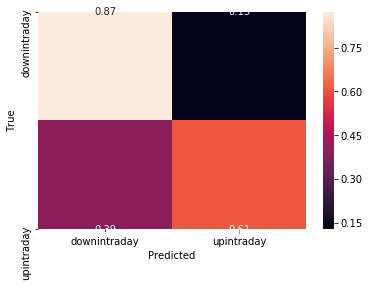

In [97]:
def get_predictions(estimator, input_fn):
    return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "downintraday", "upintraday"
]

# Create a confusion matrix on training data.
cm = tf.math.confusion_matrix(train_df["upintraday"], 
                              get_predictions(estimator, predict_train_input_fn))

# Normalize the confusion matrix so that each row sums to 1.
cm = tf.cast(cm, dtype=tf.float32)
cm = cm / tf.math.reduce_sum(cm, axis=1)[:, np.newaxis]

sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

In [36]:
y=[]
uD=[]
for i in range(len(file)):
    if(file['sentiment'][i]=="Positive"):
        y.append(1)
    elif(file['sentiment'][i]=="Negative"):
        y.append(-1)
    else:
        y.append(0)
    
    if(file['upintraday'][i]==1):
        uD.append(1)
    elif(file['upintraday'][i]==0 and file['downintraday'][i]==1):
        uD.append(-1)
    else:
        uD.append(0)

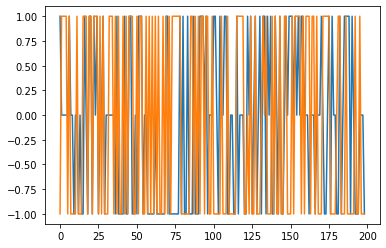

In [42]:
plt.plot(y[:199])
plt.plot(uD[:199])

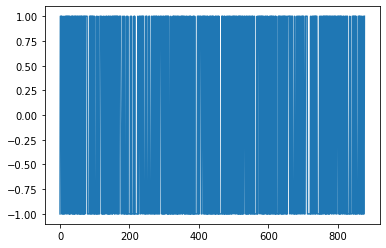

In [40]:
plt.plot(uD)

In [17]:
file.columns

Index(['Unnamed: 0', 'date', 'article', 'interday', 'intraday', 'highlow',
       'upintraday', 'downintraday', 'upinterday', 'downinterday', 'sentiment',
       'confidence', 'score'],
      dtype='object')

In [22]:
x=file['article'][:20]
y=file['sentiment'][:20]
(x+y)[0]

' *** Exxon Baytown refinery union workers reject contract offer  sources *** Union workers at Exxon Mobil Corp’s Baytown, Texas, refinery rejected a contract extension in voting completed on Friday, said sources familiar with the vote. *** HOUSTON Reuters  Union workers at Exxon Mobil Corp’s XOM.N Baytown, Texas, refinery rejected a contract extension in voting completed on Friday, said sources familiar with the vote*** HOUSTON Reuters  Union workers at Exxon Mobil Corp’s XOM.N Baytown, Texas, refinery rejected a contract extension in voting completed on Friday, said sources familiar with the vote *** Details the 52-week lows for the following companies Exxon Mobil, Chevron, Enterprise Products Partners, General Motors, Walgreens Boots Alliance and Simon Property Group Continue reading... ***NYSE:XOM shares has declined to close to the 52-week low of 62.12, which is 25.9 off the 52-week high of 83.49.… 5650 chars*** According to GuruFocus\' list of 52-week lows, these Guru stocks have